In [1]:
import numpy as np
from gpu_xray_scattering import XS
from gpu_xray_scattering.Molecule import Molecule
import glob
import MDAnalysis as mda
from MDAnalysis.topology.guessers import guess_types

def readPDB(fname, sel='protein', sel2=None, psf=None):
    if psf is not None:
        U = mda.Universe(psf, fname)
    else:
        U = mda.Universe(fname)
    Usel = U.select_atoms(sel)
    try:
        print(Uele[:3])
        Uele = Usel.elements
    except:
        guessed_elements = guess_types(U.atoms.names)
        U.add_TopologyAttr('elements', guessed_elements)
        
    
    if sel2 is not None:
        Usel2 = U.select_atoms(sel2)
        return Usel.positions, Usel.elements, Usel2.positions, Usel2.elements
    else:
        return Usel.positions, Usel.elements


In [2]:
pro_coord1, pro_ele1, pro_coord2, pro_ele2 = readPDB('data/1fin.pdb', sel='segid A', sel2='segid B')
pro_coord, pro_ele = readPDB('data/1fin.pdb', sel='all')

In [3]:
scatter = XS.Scatter(use_oa=1)

In [4]:
pro_all = Molecule(coordinates=pro_coord, elements=pro_ele)
pro1 = Molecule(coordinates=pro_coord1, elements=pro_ele1)
pro2 = Molecule(coordinates=pro_coord2, elements=pro_ele2)

In [5]:
S_calc_all = scatter.scatter(pro_all, timing=True)
S_calc_all = scatter.scatter(pro_all, timing=True)
print(S_calc_all[:10])

Elapsed time = 173.729 ms
Elapsed time = 10.329 ms
[8.73075968e+08 8.68294784e+08 8.54273408e+08 8.31383424e+08
 8.00321536e+08 7.62012416e+08 7.17572992e+08 6.68259456e+08
 6.15413824e+08 5.60405760e+08]


In [6]:
S_calc_pro, S_calc_trial, S_calc_cross = \
    scatter.cross_scatter(pro1, prior=np.empty((0, 3)), weight=np.empty(0), trial=pro2, timing=True)

Elapsed time = 15.728 ms


In [7]:
S_calc_pro[:10]

array([2.46989840e+08, 2.46149728e+08, 2.43636128e+08, 2.39502560e+08,
       2.33830816e+08, 2.26731872e+08, 2.18342432e+08, 2.08820496e+08,
       1.98341024e+08, 1.87090400e+08])

In [8]:
S_calc_trial[:10]

array([1.91289376e+08, 1.90749184e+08, 1.89130000e+08, 1.86459952e+08,
       1.82781120e+08, 1.78151152e+08, 1.72641712e+08, 1.66336624e+08,
       1.59330272e+08, 1.51725088e+08])

In [9]:
S_calc_cross[:10]

array([4.34725344e+08, 4.31395200e+08, 4.21507584e+08, 4.05422528e+08,
       3.83710528e+08, 3.57129792e+08, 3.26588992e+08, 2.93102336e+08,
       2.57742464e+08, 2.21590128e+08])

In [10]:
((S_calc_all - S_calc_pro - S_calc_trial - S_calc_cross) / S_calc_all)[:10]

array([ 8.17889881e-05,  7.73930712e-07, -3.55857969e-07, -1.94374816e-06,
       -1.15953396e-06, -5.24925830e-07, -2.00676449e-07,  0.00000000e+00,
        1.03995064e-07,  2.56956674e-07])

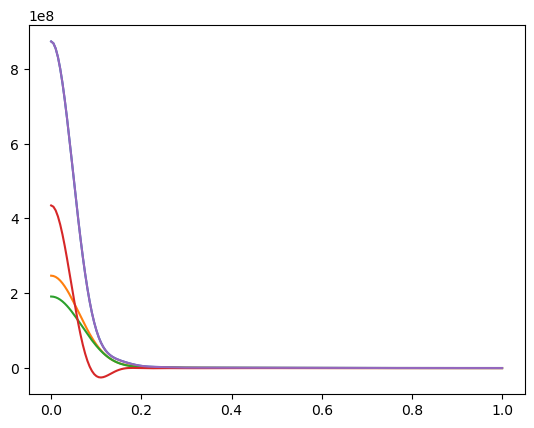

In [12]:
import matplotlib.pyplot as plt
plt.plot(scatter.q, S_calc_all, label='all')
# plt.yscale('log')
plt.plot(scatter.q, S_calc_pro, label='chain A')
plt.plot(scatter.q, S_calc_trial, )
plt.plot(scatter.q, S_calc_cross)
plt.plot(scatter.q, S_calc_pro + S_calc_trial + S_calc_cross)

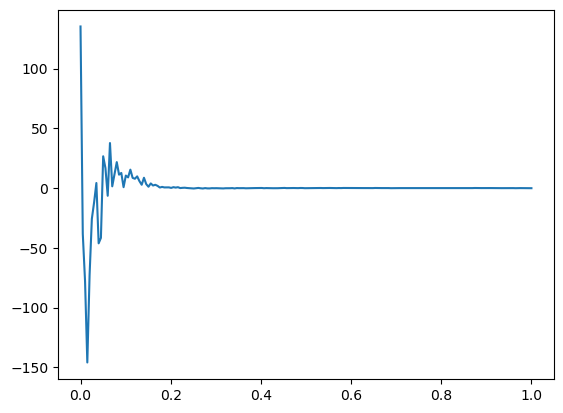

In [13]:
import matplotlib.pyplot as plt
plt.plot(scatter.q, S_calc_pro + S_calc_trial + S_calc_cross - S_calc_all)